1. 표준정규분포, t분포, F분포, 감마분포 pdf와 cdf를 plotting 하시오.

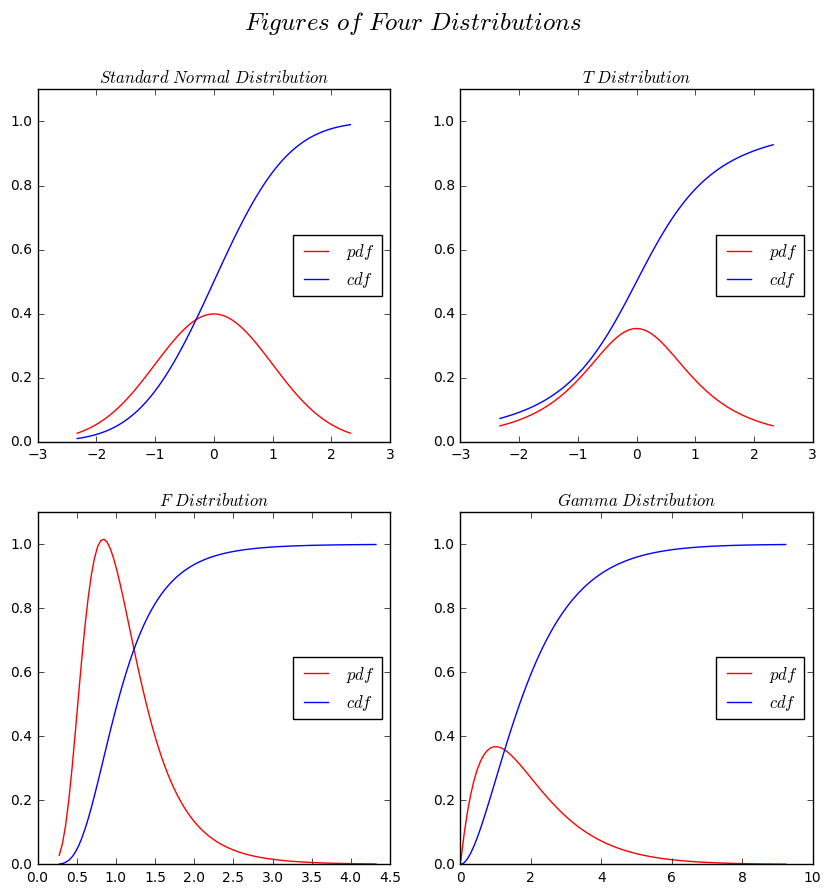

In [157]:
import numpy as np
from scipy.stats import *
import matplotlib.pyplot as plt

# subplot을 이용해서 네 개의 분포 한꺼번에 그리기

plt.figure(figsize=(10,10))
plt.suptitle(r'$Figures\ of\ Four\ Distributions$', fontsize=18)

plt.subplot(2,2,1)
X = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)

plt.title(r'$Standard\ Normal\ Distribution$')
plt.plot(X, norm.pdf(X), 'r-', label=r'$pdf$')
plt.plot(X, norm.cdf(X), 'b', label=r'$cdf$')
plt.ylim((0.0, 1.1))
plt.legend(loc='center right')

plt.subplot(2,2,2)
df = 2

plt.title(r'$T\ Distribution$')
plt.plot(X, t.pdf(X, df), 'r-', label=r'$pdf$')
plt.plot(X, t.cdf(X, df), 'b', label=r'$cdf$')
plt.ylim((0.0, 1.1))
plt.legend(loc='center right')

plt.subplot(2,2,3)
dfn, dfd = 29, 18
X = np.linspace(f.ppf(0.001, dfn, dfd), f.ppf(0.999, dfn, dfd), 100)

plt.title(r'$F\ Distribution$')
plt.plot(X, f.pdf(X, dfn, dfd), 'r-', label=r'$pdf$')
plt.plot(X, f.cdf(X, dfn, dfd), 'b', label=r'$cdf$')
plt.ylim((0.0, 1.1))
plt.legend(loc='center right')

plt.subplot(2,2,4)
df = 2.00
X = np.linspace(gamma.ppf(0.0001, df), gamma.ppf(0.999, df), 100)

plt.title(r'$Gamma\ Distribution$')
plt.plot(X, gamma.pdf(X, df), 'r-', label=r'$pdf$')
plt.plot(X, gamma.cdf(X, df), 'b', label=r'$cdf$')
plt.ylim((0.0, 1.1))
plt.legend(loc='center right')

plt.show()

2-1. 몸무게와 운동(걷기, 뛰기) 전후의 맥박수 변화를 측정한 데이터 파일(pulse_experiment.csv)가 주어져 있을 때, 다음의 사항에 대해 프로그램을 작성하시오.

(1) 운동 전후의 맥박수에 대한 plotting을 하시오.

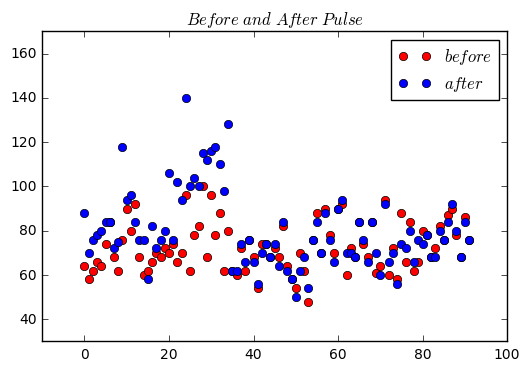

In [12]:
infile = open('pulse_experiment.csv', 'r')

data_str = []
for line in infile:
    data_str += line.split(',')
    
data = np.array(data_str)
data[data=='walking'], data[data=='running'] = 1, 2
data[data=='Male'], data[data=='Female'] = 1, 2

data = data.reshape((len(data)//5,5))
data = np.delete(data, 0, 0)

data = data.astype(np.float)

before_pulse = data.T[0]
after_pulse = data.T[1]

plt.title(r'$Before\ and\ After\ Pulse$')
plt.plot(before_pulse, 'ro', label=r'$before$')
plt.plot(after_pulse, 'bo', label=r'$after$')
plt.xlim(-10, 100)
plt.ylim(30, 170)
plt.legend(loc='upper right')
plt.show()

(2) 운동 전후의 맥박수에 대한 변화(운동후 맥박수 - 운동전 맥박수)를 구한 후, 그 차이를 plotting하시오.

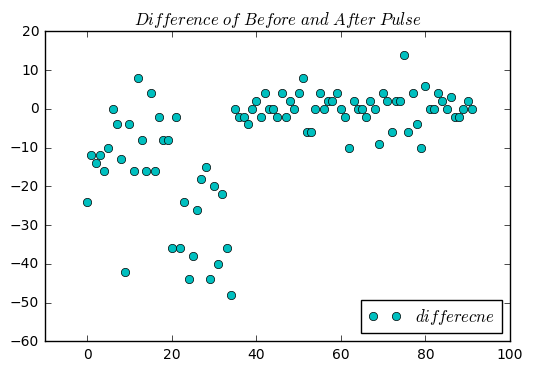

In [74]:
difference = before_pulse - after_pulse

plt.title(r'$Difference\ of\ Before\ and\ After\ Pulse$')
plt.plot(difference, 'co', label=r'$differecne$')
plt.xlim(-10,100)
plt.ylim(-60,20)
plt.legend(loc='lower right')
plt.show()

(3) (2)에서 구한 맥박수 변화에 대한 정규성 검정을 하시오.

* k2: 28.5131319156 , p_value: 6.43357063697e-07


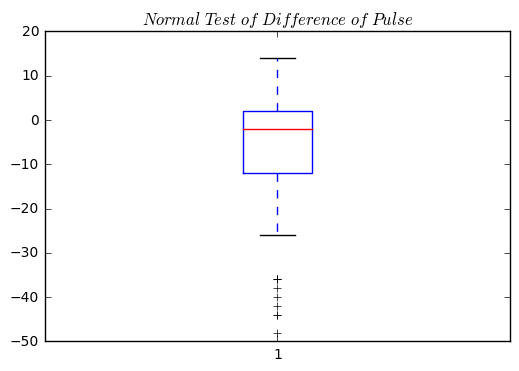

In [147]:
import scipy.stats as st

obs = np.ravel(difference)
k2, p_value = st.normaltest(obs)
print('* k2:',k2, ',', 'p_value:',p_value)

plt.title(r'$Normal\ Test\ of\ Difference\ of\ Pulse$')
plt.boxplot(obs)
plt.show()

2-2. 운동 종류(걷기, 뛰기)에 따른 관측치를 두 개의 군(group)으로 만들어 다음에 대한 프로그램을 작성하시오.

(4) 위의 (1), (2), (3)에 대한 프로그램을 작성하시오.

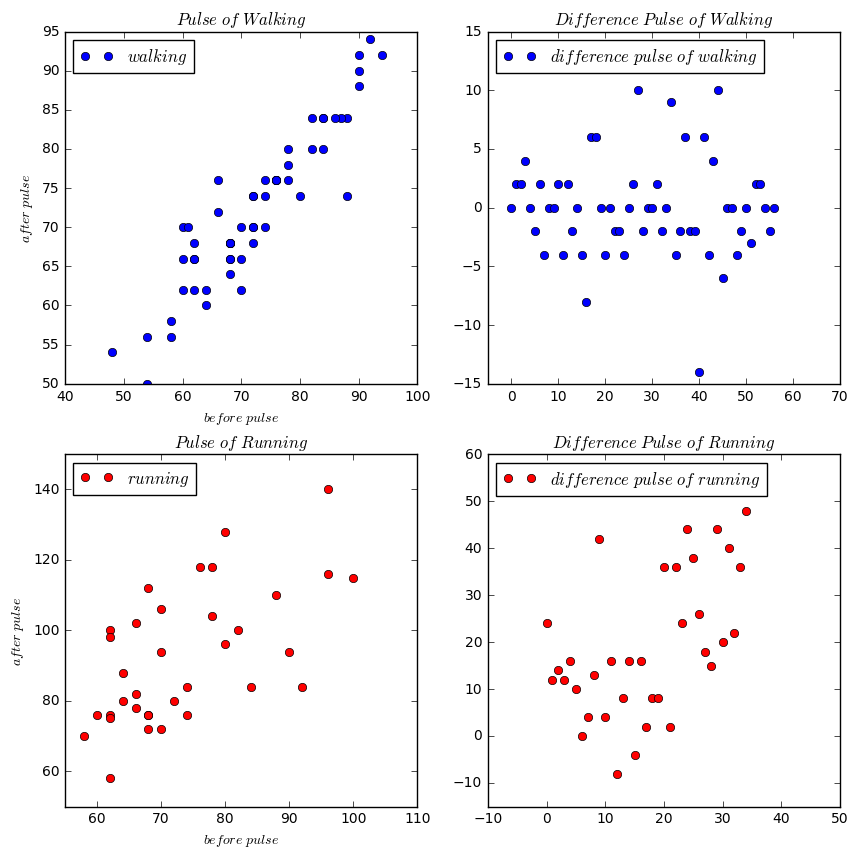

In [156]:
walking = data[data.T[2] == 1]
running = data[data.T[2] == 2]

plt.figure(figsize=(10,10))

# walking에 대한 맥박수 분포
plt.subplot(2,2,1)
plt.title(r'$Pulse\ of\ Walking$')
plt.plot(walking.T[0], walking.T[1], 'bo', label=r'$walking$')
plt.xlabel(r'$before\ pulse$')
plt.ylabel(r'$after\ pulse$')
plt.legend(loc='upper left')

# walking에서의 운동후 맥박수 - 운동전 맥박수

dif_walk = walking.T[1] - walking.T[0]

plt.subplot(2,2,2)
plt.title(r'$Difference\ Pulse\ of\ Walking$')
plt.plot(dif_walk, 'bo', label=r'$difference\ pulse\ of\ walking$')
plt.xlim(-5,70)
plt.ylim(-15,15)
plt.legend(loc='upper left')

# running에 대한 맥박수 분포
plt.subplot(2,2,3)
plt.title(r'$Pulse\ of\ Running$')
plt.plot(running.T[0], running.T[1], 'ro', label=r'$running$')
plt.xlabel(r'$before\ pulse$')
plt.ylabel(r'$after\ pulse$')
plt.xlim(55,110)
plt.ylim(50,150)
plt.legend(loc='upper left')

# running에서의 운동후 맥박수 - 운동전 맥박수

dif_run = running.T[1] - running.T[0]

plt.subplot(2,2,4)
plt.title(r'$Difference\ Pulse\ of\ Running$')
plt.plot(dif_run, 'ro', label=r'$difference\ pulse\ of\ running$')
plt.xlim(-10,50)
plt.ylim(-15,60)
plt.legend(loc='upper left')

plt.show()

* walking
 k2: 5.31108768484 , p_value: 0.0702606175688

* running
 k2: 2.59431008981 , p_value: 0.273308237699


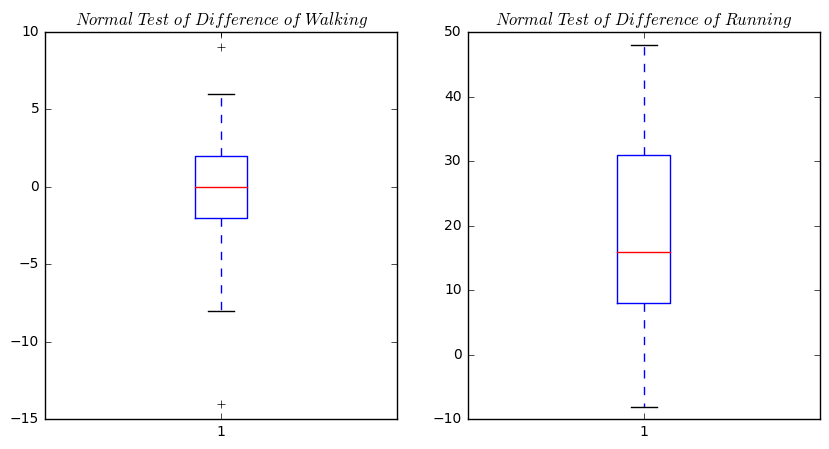

In [154]:
# walking에서의 맥박수 차이에 대한 정규성 검정

plt.figure(figsize=(10,5))

obs_walk = np.ravel(dif_walk)
k2, p_value = st.normaltest(obs_walk)
print('* walking\n','k2:',k2,',','p_value:', p_value)

plt.subplot(1,2,1)
plt.title(r'$Normal\ Test\ of\ Difference\ of\ Walking$')
plt.boxplot(obs_walk)

# running에서의 맥박수 차이에 대한 정규성 검정

obs_run = np.ravel(dif_run)
k2, p_value = st.normaltest(obs_run)
print('\n* running\n','k2:',k2,',','p_value:', p_value)

plt.subplot(1,2,2)
plt.title(r'$Normal\ Test\ of\ Difference\ of\ Running$')
plt.boxplot(obs_run)

plt.show()

(5) 운동 종류에 따른 맥박수 변화에 대한 평균의 차이가 있는가에 대해 검정하시오.

In [155]:
# walking과 running의 기술통계랑 값

print('* Walking:',st.describe(obs_walk),'\n')
print('* Running:',st.describe(obs_run),'\n')

# 양측 검정 (독립표본 t-검정)

print('*',ttest_ind(obs_walk, obs_run))
print('\n* 결론: alpha=0.05라고 가정할 때, pvalue<0.05이므로 두 집단의 평균이 같다는 가설을 기각한다. 즉, 두 집단의 평균에 차이가 있다.')

* Walking: DescribeResult(nobs=57, minmax=(-14.0, 10.0), mean=-0.10526315789473684, variance=17.310150375939848, skewness=4.573417612773563e-05, kurtosis=1.7586963012536874) 

* Running: DescribeResult(nobs=35, minmax=(-8.0, 48.0), mean=18.914285714285715, variance=226.49243697478988, skewness=0.3507014029400056, kurtosis=-0.8584131656384137) 

* Ttest_indResult(statistic=-9.0237419399093515, pvalue=3.0721103270650765e-14)

* 결론: alpha=0.05라고 가정할 때, pvalue<0.05이므로 두 집단의 평균이 같다는 가설을 기각한다. 즉, 두 집단의 평균에 차이가 있다.


(6) 몸무게와 맥박수 변화에 대한 관계를 plotting 하시오.

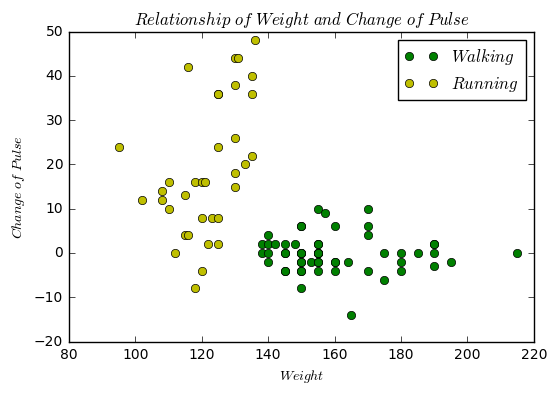

In [135]:
weight_walk = walking.T[4]
weight_run = running.T[4]

plt.title(r'$Relationship\ of\ Weight\ and\ Change\ of\ Pulse$')
plt.plot(weight_walk, dif_walk, 'go', label=r'$Walking$')
plt.plot(weight_run, dif_run, 'yo', label=r'$Running$')
plt.legend(loc='upper right')
plt.xlabel(r'$Weight$')
plt.ylabel(r'$Change\ of\ Pulse$')

plt.show()